# Stochastic Processes: <br>Data Analysis and Computer Simulation
<br>


# Brownian motion 2: computer simulation
<br>


# 3. Simulations with on-the-fly animation
<br>

# 3.1. Simulation code with on-the-fly animation

## Import libraries

In [6]:
% matplotlib inline
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt 
import matplotlib.mlab as mlab # import mlab module to use MATLAB commands with the same names
import matplotlib.animation as animation # import animation modules from matplotlib
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from mpl_toolkits.mplot3d
from IPython.display import HTML
plt.style.use('ggplot') # use "ggplot" style for graphs

## Define `init` function for `FuncAnimation`

In [7]:
def init():
    global R,V,W,Rs,Vs,Ws,time
    R[:,:] = 0.0 # initialize all the variables to zero
    V[:,:] = 0.0 # initialize all the variables to zero
    W[:,:] = 0.0 # initialize all the variables to zero
    Rs[:,:,:] = 0.0 # initialize all the variables to zero
    Vs[:,:,:] = 0.0 # initialize all the variables to zero
    Ws[:,:,:] = 0.0 # initialize all the variables to zero
    time[:]   = 0.0 # initialize all the variables to zero
    title.set_text(r'') # empty title
    line.set_data([],[]) # set line data to show the trajectory of particle n in 2d (x,y)
    line.set_3d_properties([]) # add z-data separately for 3d plot
    particles.set_data([],[]) # set position current (x,y) position data for all particles
    particles.set_3d_properties([]) # add current z data of particles to get 3d plot
    return particles,title,line # return listed objects that will be drawn by FuncAnimation

## Define `animate` function for `FuncAnimation`

In [8]:
def animate(i):
    global R,V,W,Rs,Vs,Ws,time # define global variables
    time[i]=i*dt # store time in each step in an array time
    W = std*np.random.randn(nump,dim) # generate an array of random forces accordingly to Eqs.(F10) and (F11)
    R, V = R + V*dt, V*(1-zeta/m*dt)+W/m # update R & V via Eqs.(F5)&(F9)
    Rs[i,:,:]=R # accumulate particle positions at each step in an array Rs
    Vs[i,:,:]=V # accumulate particle velocitys at each step in an array Vs
    Ws[i,:,:]=W # accumulate random forces at each step in an array Ws
    title.set_text(r"t = "+str(time[i])) # set the title to display the current time
    line.set_data(Rs[:i+1,n,0],Rs[:i+1,n,1]) # set the line in 2D (x,y)
    line.set_3d_properties(Rs[:i+1,n,2]) # add z axis to set the line in 3D
    particles.set_data(R[:,0],R[:,1]) # set the current position of all the particles in 2d (x,y)
    particles.set_3d_properties(R[:,2]) # add z axis to set the particle in 3D
    return particles,title,line # return listed objects that will be drawn by FuncAnimation

## Set parameters and initialize variables

In [9]:
dim  = 3 # system dimension (x,y,z)
nump = 1000 # number of independent Brownian particles to simulate 
nums = 1024 # number of simulation steps
dt   = 0.05 # set time increment, \Delta t
zeta = 1.0 # set friction constant, \zeta
m    = 1.0 # set particle mass, m
kBT  = 1.0 # set temperatute, k_B T
std  = np.sqrt(2*kBT*zeta*dt) # calculate std for \Delta W via Eq.(F11)
np.random.seed(0) # initialize random number generator with a seed=0
R = np.zeros([nump,dim]) # array to store current positions and set initial condition Eq.(F12)
V = np.zeros([nump,dim]) # array to store current velocities and set initial condition Eq.(F12)
W = np.zeros([nump,dim]) # array to store current random forcces
Rs = np.zeros([nums,nump,dim]) # array to store positions at all steps
Vs = np.zeros([nums,nump,dim]) # array to store velocities at all steps
Ws = np.zeros([nums,nump,dim]) # array to store random forces at all steps
time = np.zeros([nums]) # an array to store time at all steps

## Perform and animate the simulation using `FuncAnimation` 

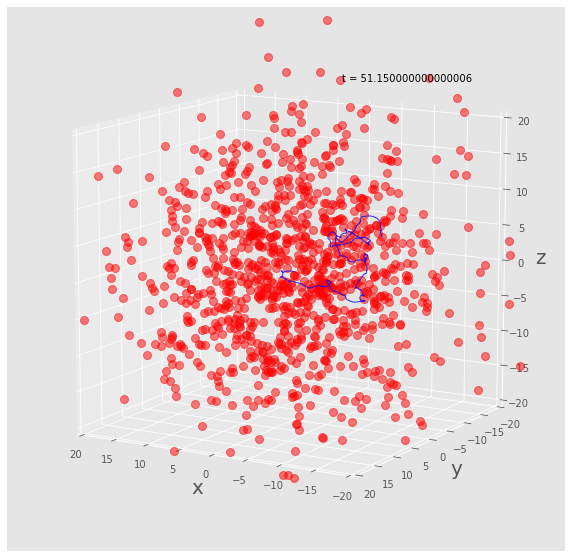

In [10]:
fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 2D axes
box = 40 # set draw area as box^3
ax.set_xlim(-box/2,box/2) # set x-range
ax.set_ylim(-box/2,box/2) # set y-range
ax.set_zlim(-box/2,box/2) # set z-range
ax.set_xlabel(r"x",fontsize=20) # set x-lavel
ax.set_ylabel(r"y",fontsize=20) # set y-lavel
ax.set_zlabel(r"z",fontsize=20) # set z-lavel
ax.view_init(elev=12,azim=120) # set view point
particles, = ax.plot([],[],[],'ro',ms=8,alpha=0.5) # define object particles
title = ax.text(-180.,0.,250.,r'',transform=ax.transAxes,va='center') # define object title
line, = ax.plot([],[],[],'b',lw=1,alpha=0.8) # define object line
n = 0 # trajectry line is plotted for the n-th particle
anim = animation.FuncAnimation(fig,func=animate,init_func=init,
            frames=nums,interval=5,blit=True,repeat=False)
## If you have ffmpeg installed on your machine 
## you can save the animation by uncomment the last line
## You may install ffmpeg by typing the following command in command prompt
## conda install -c menpo ffmpeg
## 
# anim.save('movie.mp4',fps=50,dpi=100)
HTML(anim.to_html5_video())

## Summary of simulation methods

### Original differential equation

\begin{equation}
\frac{d\mathbf{R}(t)}{dt}=\mathbf{V}(t)\tag{F1}
\end{equation}

\begin{equation}
m\frac{d\mathbf{V}(t)}{dt}=\color{black}{-\zeta\mathbf{V}(t)}+\color{black}{\mathbf{F}(t)} 
\tag{F2}
\end{equation}
$\hspace{80mm}$with
\begin{equation}
\langle \mathbf{F}(t)\rangle=\mathbf{0} 
\tag{F3}
\end{equation}

\begin{equation}
\langle \mathbf{F}(t)\mathbf{F}(0)\rangle = {2k_B T\zeta}\mathbf{I}\delta(t)  
\tag{F4}
\end{equation}

### Euler method

$$
\mathbf{V}_{i+1}
=\left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i + \frac{1}{m} {\Delta \mathbf{W}_i} 
\tag{F9}
$$

$$
\mathbf{R}_{i+1}=\mathbf{R}_i+\mathbf{V}_i \Delta t \hspace{15mm}\tag{B3}
$$
$\hspace{80mm}$with
\begin{equation}
\langle \Delta \mathbf{W}_i\rangle=\mathbf{0} 
\tag{F10}
\end{equation}

\begin{equation}
\langle \Delta \mathbf{W}_i\Delta \mathbf{W}_j\rangle = {2k_B T\zeta}\Delta t\mathbf{I}\delta_{ij}  
\tag{F11}
\end{equation}


### 2nd order Runge-Kutta method

$$
\mathbf{V}'_{i+\frac{1}{2}}
=\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{2}\mathbf{V}_{i}  
=\left(1-\frac{\zeta}{m}\frac{\Delta t}{2}\right)\mathbf{V}_{i}  
\tag{F12}
$$

$$
\mathbf{V}_{i+1}
=\mathbf{V}_i-\frac{\zeta}{m}\Delta t\mathbf{V}'_{i+\frac{1}{2}} + \frac{1}{m} {\Delta \mathbf{W}_i} 
\tag{F13}
$$

$$
\mathbf{R}_{i+1}=\mathbf{R}_i+\mathbf{V}'_{i+\frac{1}{2}} \Delta t \hspace{15mm}
\tag{F14}
$$


### 4th order Runge-Kutta method

$$
\mathbf{V}'_{i+\frac{1}{2}}
=\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{2}\mathbf{V}_{i}  
\tag{F15}
$$

$$
\mathbf{V}''_{i+\frac{1}{2}}
=\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{2}\mathbf{V}'_{i+\frac{1}{2}}  
\tag{F16}
$$

$$
\mathbf{V}'''_{i+1}
=\mathbf{V}_i-\frac{\zeta}{m}{\Delta t}\mathbf{V}''_{i+\frac{1}{2}}  
\tag{F17}
$$


$$
\mathbf{V}_{i+1}
=\mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{6}\left(\mathbf{V}+\mathbf{V}'_{i+\frac{1}{2}}+\mathbf{V}''_{i+\frac{1}{2}}+\mathbf{V}'''_{i+1}\right) + \frac{1}{m} {\Delta \mathbf{W}_i} 
\tag{F18}
$$

$$
\mathbf{R}_{i+1}=\mathbf{R}_i+
\frac{\Delta t}{6}\left(\mathbf{V}+\mathbf{V}'_{i+\frac{1}{2}}+\mathbf{V}''_{i+\frac{1}{2}}+\mathbf{V}'''_{i+1}\right)
\hspace{15mm}
\tag{F19}
$$
